In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [3]:
#load in csv for movies and tv shows
cleaned_movie = pd.read_csv("Resources/movie_df.csv")
del cleaned_movie["Unnamed: 0"]
cleaned_movie = cleaned_movie.drop_duplicates()
cleaned_movie

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Robert De Niro,Travis Bickle,ACTOR,1976,0.0,8.2,808582.0,['US']
1,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Jodie Foster,Iris Steensma,ACTOR,1976,0.0,8.2,808582.0,['US']
2,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Albert Brooks,Tom,ACTOR,1976,0.0,8.2,808582.0,['US']
3,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,1976,0.0,8.2,808582.0,['US']
4,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Cybill Shepherd,Betsy,ACTOR,1976,0.0,8.2,808582.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48780,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Jim Pirri,Sal Maroni (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
48781,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Zach Callison,Young Bruce Wayne (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
48782,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Rick D. Wasserman,Bodyguard (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
48783,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Chris Palmer,--,DIRECTOR,2021,0.0,7.1,12033.0,['US']


In [4]:
cleaned_tv = pd.read_csv("Resources/show_df.csv")
del cleaned_tv["Unnamed: 0"]
cleaned_tv = cleaned_tv.drop_duplicates()
cleaned_tv

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Graham Chapman,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
1,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Michael Palin,"Various / ""It's"" man",ACTOR,1969,4.0,8.8,73424.0,['GB']
2,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Terry Jones,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
3,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Eric Idle,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
4,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Terry Gilliam,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Shunsuke Takeuchi,Makoto Suzuki (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']
7864,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Shota Hayama,Kazushi Yamagishi (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']
7865,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Satoshi Hino,Masataka Koyomizu (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']
7866,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Masaaki Mizunaka,Keisuke Baji (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']


In [24]:
#load in netflix dataframe
netflix_df = pd.read_csv("Resources/netflix_df.csv")
del netflix_df["Unnamed: 0"]
netflix_df = netflix_df.drop_duplicates()
netflix_df

,id,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,tm84618,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Robert De Niro,Travis Bickle,ACTOR,1976,0.0,8.2,808582.0,['US']
1,tm84618,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Jodie Foster,Iris Steensma,ACTOR,1976,0.0,8.2,808582.0,['US']
2,tm84618,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Albert Brooks,Tom,ACTOR,1976,0.0,8.2,808582.0,['US']
3,tm84618,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,1976,0.0,8.2,808582.0,['US']
4,tm84618,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Cybill Shepherd,Betsy,ACTOR,1976,0.0,8.2,808582.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,ts278,Black Mirror,SHOW,TV-MA,59,"['drama', 'scifi', 'thriller', 'european']",--,--,--,2011,5.0,8.8,526383.0,['GB']
18386,ts35256,Chef's Table,SHOW,TV-MA,50,['documentation'],--,--,--,2015,7.0,8.5,15352.0,['US']
18387,ts88361,"Love, Death & Robots",SHOW,TV-MA,13,"['scifi', 'animation', 'thriller', 'horror', '...",--,--,--,2019,3.0,8.4,131937.0,['US']
18388,ts227305,Tiger King,SHOW,TV-MA,44,"['documentation', 'crime']",--,--,--,2020,2.0,7.5,77790.0,['US']


In [23]:
#load in hulu dataframe
hulu_df = pd.read_csv("Resources/hulu_df.csv")
del hulu_df["Unnamed: 0"]
hulu_df = hulu_df.drop_duplicates()
hulu_df

,id,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,ts20475,Saturday Night Live,SHOW,TV-14,89,"['music', 'comedy']",Aidy Bryant,Self - Various Characters,ACTOR,1975,47.0,8.0,47910.0,['US']
1,ts20475,Saturday Night Live,SHOW,TV-14,89,"['music', 'comedy']",Michael Che,Self - Various Characters,ACTOR,1975,47.0,8.0,47910.0,['US']
2,ts20475,Saturday Night Live,SHOW,TV-14,89,"['music', 'comedy']",Pete Davidson,Self - Various Characters,ACTOR,1975,47.0,8.0,47910.0,['US']
3,ts20475,Saturday Night Live,SHOW,TV-14,89,"['music', 'comedy']",Mikey Day,Self - Various Characters,ACTOR,1975,47.0,8.0,47910.0,['US']
4,ts20475,Saturday Night Live,SHOW,TV-14,89,"['music', 'comedy']",Colin Jost,Self - Various Characters,ACTOR,1975,47.0,8.0,47910.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,tm919867,"Quo Vadis, Aida?",MOVIE,NaN,101,"['drama', 'history', 'war']",Alija Aljević,Zulfo,ACTOR,2021,0.0,8.0,31596.0,"['NO', 'TR', 'NL', 'DE', 'BA', 'FR', 'PL', 'RO..."
10028,tm919867,"Quo Vadis, Aida?",MOVIE,NaN,101,"['drama', 'history', 'war']",Damir Mahmutović,Branko,ACTOR,2021,0.0,8.0,31596.0,"['NO', 'TR', 'NL', 'DE', 'BA', 'FR', 'PL', 'RO..."
10029,tm919867,"Quo Vadis, Aida?",MOVIE,NaN,101,"['drama', 'history', 'war']",Dražen Pavlović,Idris,ACTOR,2021,0.0,8.0,31596.0,"['NO', 'TR', 'NL', 'DE', 'BA', 'FR', 'PL', 'RO..."
10030,tm919867,"Quo Vadis, Aida?",MOVIE,NaN,101,"['drama', 'history', 'war']",Jasmila Žbanić,--,DIRECTOR,2021,0.0,8.0,31596.0,"['NO', 'TR', 'NL', 'DE', 'BA', 'FR', 'PL', 'RO..."


In [25]:
#load in hbo dataframe
hbo_df = pd.read_csv("Resources/hbo_df.csv")
del hbo_df["Unnamed: 0"]
hbo_df = hbo_df.drop_duplicates()
hbo_df

,id,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,tm155702,The Wizard of Oz,MOVIE,G,102,"['fantasy', 'family']",Judy Garland,Dorothy Gale,ACTOR,1939,0.0,8.1,389774.0,['US']
1,tm155702,The Wizard of Oz,MOVIE,G,102,"['fantasy', 'family']",Ray Bolger,Hunk / Scarecrow,ACTOR,1939,0.0,8.1,389774.0,['US']
2,tm155702,The Wizard of Oz,MOVIE,G,102,"['fantasy', 'family']",Jack Haley,Hickory / Tin Man,ACTOR,1939,0.0,8.1,389774.0,['US']
3,tm155702,The Wizard of Oz,MOVIE,G,102,"['fantasy', 'family']",Bert Lahr,Zeke / Cowardly Lion,ACTOR,1939,0.0,8.1,389774.0,['US']
4,tm155702,The Wizard of Oz,MOVIE,G,102,"['fantasy', 'family']",Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,ACTOR,1939,0.0,8.1,389774.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28851,tm996852,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Jim Pirri,Sal Maroni (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
28852,tm996852,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Zach Callison,Young Bruce Wayne (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
28853,tm996852,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Rick D. Wasserman,Bodyguard (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
28854,tm996852,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Chris Palmer,--,DIRECTOR,2021,0.0,7.1,12033.0,['US']


The r value is: 0.35


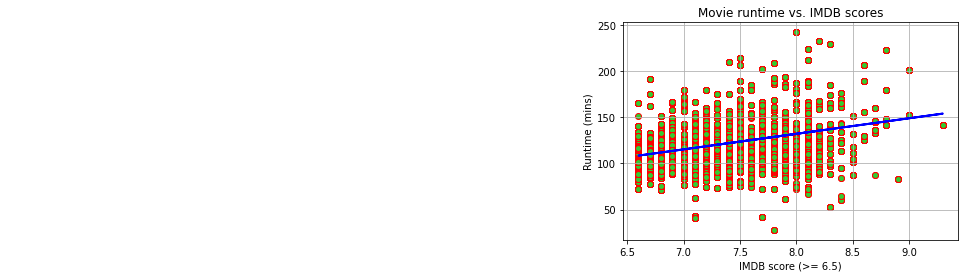

In [5]:
#score vs. movie runtime graph
x_value = cleaned_movie["imdb_score"]
y_value = cleaned_movie["runtime"]
plt.scatter(x_value,y_value, marker="o", color="limegreen", edgecolors="red")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"blue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="blue",fontsize=16)
print(f"The r value is: {round(rvalue,2)}")
plt.title("Movie runtime vs. IMDB scores")
plt.xlabel("IMDB score (>= 6.5)")
plt.ylabel("Runtime (mins)")
plt.show()

There is a very weak positive correlation between a movie's runtime and its IMDb score.

The r value is: 0.11


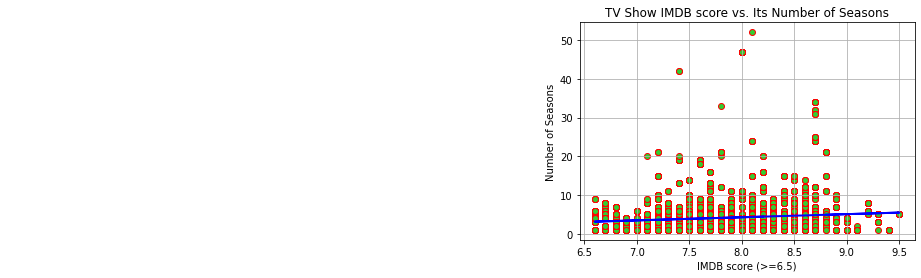

In [6]:
#score vs. season graph
x_value = cleaned_tv["imdb_score"]
y_value = cleaned_tv["seasons"]
plt.scatter(x_value,y_value, marker="o", color="limegreen", edgecolors="red")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"blue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="blue",fontsize=16)
plt.title("TV Show IMDB score vs. Its Number of Seasons")
plt.xlabel("IMDB score (>=6.5)")
plt.ylabel("Number of Seasons")
print(f"The r value is: {round(rvalue,2)}")
plt.show()

There is almost no correlation between a show's IMDb score and the number of seasons it aired.

In [7]:
director_df = cleaned_movie[cleaned_movie["role"]=="DIRECTOR"]
director_df

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
36,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Martin Scorsese,--,DIRECTOR,1976,0.0,8.2,808582.0,['US']
59,tm154986,1.0,0.0,0.0,Deliverance,MOVIE,R,109,"['drama', 'action', 'thriller', 'european']",John Boorman,--,DIRECTOR,1972,0.0,7.7,107673.0,['US']
106,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",Terry Jones,--,DIRECTOR,1975,0.0,8.2,534486.0,['GB']
107,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",Terry Gilliam,--,DIRECTOR,1975,0.0,8.2,534486.0,['GB']
162,tm120801,1.0,0.0,0.0,The Dirty Dozen,MOVIE,NaN,150,"['war', 'action']",Robert Aldrich,--,DIRECTOR,1967,0.0,7.7,72662.0,"['GB', 'US']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48710,tm1128929,0.0,0.0,1.0,Harry Potter 20th Anniversary: Return to Hogwarts,MOVIE,PG-13,103,"['documentation', 'family']",Casey Patterson,--,DIRECTOR,2022,0.0,8.0,37637.0,"['US', 'GB']"
48711,tm1128929,0.0,0.0,1.0,Harry Potter 20th Anniversary: Return to Hogwarts,MOVIE,PG-13,103,"['documentation', 'family']",Giorgio Testi,--,DIRECTOR,2022,0.0,8.0,37637.0,"['US', 'GB']"
48725,tm1048591,0.0,0.0,1.0,8-Bit Christmas,MOVIE,PG,97,"['comedy', 'family', 'fantasy']",Michael Dowse,--,DIRECTOR,2021,0.0,6.7,15561.0,['US']
48762,tm1042385,0.0,0.0,1.0,Friends: The Reunion,MOVIE,NaN,104,"['documentation', 'comedy', 'history', 'romance']",Ben Winston,--,DIRECTOR,2021,0.0,8.0,57553.0,['US']


In [8]:
#use groupby to match director with avg imdb score
group_director = director_df.groupby("name")
avg_score = group_director.mean().reset_index()
avg_score = avg_score[["name","imdb_score"]]
avg_score

,name,imdb_score
0,A.R. Murugadoss,7.00
1,Aamir Khan,8.30
2,Aaron Horvath,6.70
3,Aaron Moorhead,6.70
4,Aaron Sorkin,7.55
...,...,...
942,Zack Snyder,7.40
943,Zal Batmanglij,6.80
944,Zoya Akhtar,7.40
945,Éric Rohmer,7.80


In [9]:
#use previous dataframe to get the number of movies each director has made
director_movie = group_director.count().reset_index()
director_movie = director_movie[["name","title"]]
director_movie

,name,title
0,A.R. Murugadoss,1
1,Aamir Khan,1
2,Aaron Horvath,1
3,Aaron Moorhead,1
4,Aaron Sorkin,2
...,...,...
942,Zack Snyder,4
943,Zal Batmanglij,1
944,Zoya Akhtar,3
945,Éric Rohmer,1


In [10]:
#merge the two dataframes together and filter out directors with less than 4 movies
final_director = pd.merge(director_movie, avg_score, how="outer", on=["name"])
final_director = final_director[final_director["title"]>3]
final_director = final_director[["name","imdb_score"]]
final_director.sort_values("imdb_score",ascending=False)

,name,imdb_score
19,Akira Kurosawa,8.275000
159,Charlie Chaplin,8.225000
180,Christopher Nolan,8.180000
692,Peter Jackson,8.114286
836,Stanley Kubrick,8.100000
581,Martin Scorsese,8.077778
360,Ingmar Bergman,8.071429
232,Denis Villeneuve,8.050000
709,Quentin Tarantino,8.033333
342,Hayao Miyazaki,8.030000


Akira Kurosawa has the highest average IMDb score with: 8.274999999999999


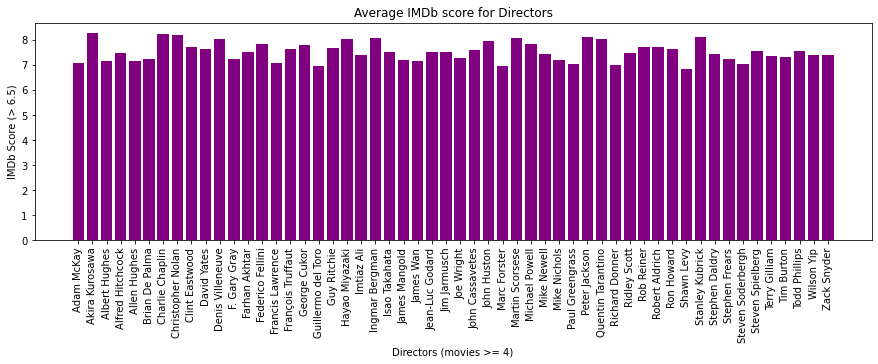

In [12]:
#create bar graph displaying director scores
plt.figure(figsize=(15,4))
plt.bar(final_director["name"],final_director["imdb_score"],color="purple")
plt.xticks(rotation="vertical")
plt.title("Average IMDb score for Directors")
plt.xlabel("Directors (movies >= 4)")
plt.ylabel("IMDb Score (> 6.5)")
print(f"Akira Kurosawa has the highest average IMDb score with: {final_director.max(numeric_only=True).max()}")
plt.show()

In [13]:
#filter dataframe to show Akira Kurosawa's movies
akira_df = cleaned_movie[cleaned_movie["name"]=="Akira Kurosawa"]
akira_df

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
22767,tm58806,0.0,0.0,1.0,Rashomon,MOVIE,NaN,88,"['drama', 'crime']",Akira Kurosawa,--,DIRECTOR,1950,0.0,8.2,165278.0,['JP']
25274,tm18043,0.0,0.0,1.0,Seven Samurai,MOVIE,NaN,207,"['drama', 'action']",Akira Kurosawa,--,DIRECTOR,1954,0.0,8.6,338570.0,['JP']
25909,tm32149,0.0,0.0,1.0,High and Low,MOVIE,NaN,143,"['thriller', 'crime', 'drama']",Akira Kurosawa,--,DIRECTOR,1963,0.0,8.4,42634.0,['JP']
26077,tm41864,0.0,0.0,1.0,Yojimbo,MOVIE,NaN,110,"['thriller', 'crime', 'comedy', 'action', 'dra...",Akira Kurosawa,--,DIRECTOR,1961,0.0,8.2,120681.0,['JP']
27122,tm65430,0.0,0.0,1.0,Ikiru,MOVIE,NaN,143,['drama'],Akira Kurosawa,--,DIRECTOR,1952,0.0,8.3,76619.0,['JP']
27189,tm119925,0.0,0.0,1.0,Throne of Blood,MOVIE,NaN,108,"['drama', 'history']",Akira Kurosawa,--,DIRECTOR,1957,0.0,8.1,51378.0,['JP']
27362,tm81379,0.0,0.0,1.0,Red Beard,MOVIE,NaN,185,['drama'],Akira Kurosawa,--,DIRECTOR,1965,0.0,8.3,18849.0,['JP']
27865,tm127957,0.0,0.0,1.0,The Hidden Fortress,MOVIE,NaN,139,"['comedy', 'drama', 'action']",Akira Kurosawa,--,DIRECTOR,1958,0.0,8.1,38445.0,['JP']


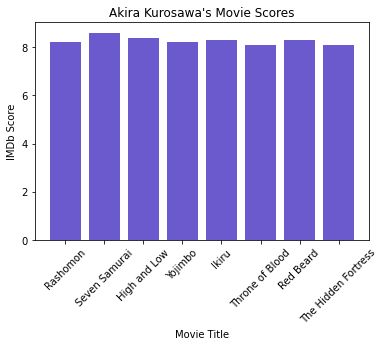

Seven Samurai is Akira Kurosawa's highest scoring film.


In [16]:
#create bar graph that shows Akira Kurosawa's movies and their scores
plt.bar(akira_df["title"],akira_df["imdb_score"],color="slateblue")
plt.xticks(rotation=45)
plt.title("Akira Kurosawa's Movie Scores")
plt.xlabel("Movie Title")
plt.ylabel("IMDb Score")
plt.show()
print("Seven Samurai is Akira Kurosawa's highest scoring film.")